In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.seasonal as seasonal
import statsmodels.tsa.holtwinters as hw
import locale
import matplotlib.patches as mpatches
import requests
import io
import datetime as dt
import numpy as np

In [43]:
def char_range(c1, n):
    """Generates the characters from `c1` to `c2`, inclusive."""
    for c in range(ord(c1), ord(c1)+n):
        yield chr(c)
list(char_range('a',5))
locale.setlocale(locale.LC_ALL, 'de_DE')
today = dt.datetime.today().strftime("%-d. %B 2020")
today

'2. August 2020'

In [44]:
r = requests.get(r'https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile')
test = pd.read_excel(io.BytesIO(r.content),1,columns = list('abcdefghijk'))

In [45]:
nowcast = test #pd.read_excel('nowcast.xlsx',1,columns = list('abcdefghijk'))
nowcast.columns = list(char_range('a',len(nowcast.columns)))
nowcast.index = nowcast.a
pd.set_option("display.max_rows", 20, "display.max_columns", None)
print("Last update:",nowcast.index[-1]+dt.timedelta(4))
nowcast

Last update: 2020-08-01 00:00:00


,a,b,c,d,e,f,g,h,i,j,k,l,m
a,,,,,,,,,,,,,
2020-03-02,2020-03-02,303,288,320,225,212,238,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,2020-03-03,320,305,336,260,246,275,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,2020-03-04,448,430,465,325,309,341,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,2020-03-05,505,483,524,394,376,411,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,2020-03-06,758,736,787,508,488,528,2.26,2.18,2.34,2.34,2.30,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,2020-07-24,711,554,855,706,594,821,1.32,1.18,1.44,1.19,1.12,1.27
2020-07-25,2020-07-25,630,445,794,688,551,819,1.19,1.04,1.32,1.18,1.09,1.27
2020-07-26,2020-07-26,699,524,893,679,524,833,1.05,0.90,1.21,1.21,1.09,1.32


In [46]:
# #Seasonal decomposition of Nowcast values not smoothed
# import statsmodels.tsa.seasonal as seasonal
# result_b = seasonal.seasonal_decompose(nowcast.b,model="multiplicative")
# plot = result_b.plot()

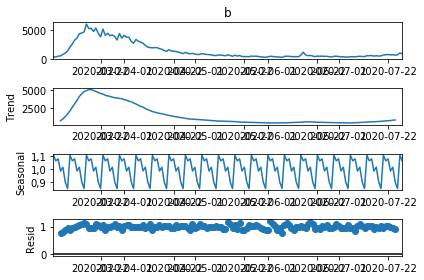

In [47]:
#Seasonal decomposition of Nowcast values not smoothed
import statsmodels.tsa.seasonal as seasonal
nowcast.b[nowcast.index == dt.datetime(2020,6,15)] = 500
nowcast.b[nowcast.index == dt.datetime(2020,6,16)] = 500
nowcast.b[nowcast.index == dt.datetime(2020,6,17)] = 500
result_b = seasonal.seasonal_decompose(nowcast.b,model="multiplicative")
result_b.observed[result_b.observed.index == dt.datetime(2020,6,15)] = 645
result_b.observed[result_b.observed.index == dt.datetime(2020,6,16)] = 1123
result_b.observed[result_b.observed.index == dt.datetime(2020,6,17)] = 669
nowcast.b[nowcast.index == dt.datetime(2020,6,15)] = 645
nowcast.b[nowcast.index == dt.datetime(2020,6,16)] = 1123
nowcast.b[nowcast.index == dt.datetime(2020,6,17)] = 669
plot = result_b.plot()

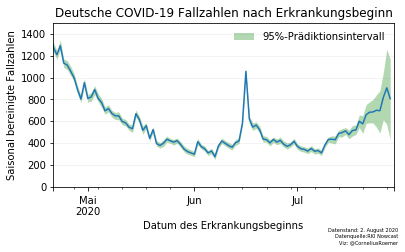

In [48]:
left_end=50
adjusted_b = result_b.observed / result_b.seasonal
adjusted_c = nowcast.c[left_end:] / result_b.seasonal
adjusted_d = nowcast.d[left_end:] / result_b.seasonal

locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[2:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(left=nowcast.index[left_end],right=nowcast.index[-1]+pd.Timedelta(days=1))
ax.set_ylim(top=1500,bottom=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
plt.title("Deutsche COVID-19 Fallzahlen nach Erkrankungsbeginn")
plt.ylabel("Saisonal bereinigte Fallzahlen")
plt.xlabel("Datum des Erkrankungsbeginns")
ax.tick_params(axis='x', which='major', pad=5)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.25)
fig.text(0.91, 0.02, "Datenstand: " + today + "\nDatenquelle:RKI Nowcast\nViz: @CorneliusRoemer", size=5, va="bottom", ha="right")
plt.savefig('CasesNear.png',dpi=300)

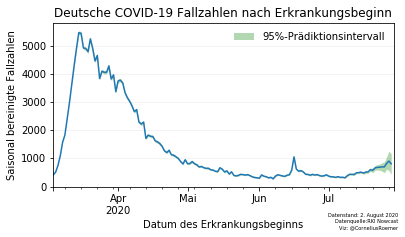

In [49]:
adjusted_b = result_b.observed / result_b.seasonal
adjusted_c = nowcast.c[10:] / result_b.seasonal
adjusted_d = nowcast.d[10:] / result_b.seasonal

locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[2:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(right=nowcast.index[-1]+pd.Timedelta(days=1))
#ax.set_ylim(top=5000,bottom=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
plt.title("Deutsche COVID-19 Fallzahlen nach Erkrankungsbeginn")
plt.ylabel("Saisonal bereinigte Fallzahlen")
plt.xlabel("Datum des Erkrankungsbeginns")
#ax.tick_params(axis='x', which='major', pad=-5)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.25)
fig.text(0.91, 0.08, "Datenstand: " + today + "\nDatenquelle:RKI Nowcast\nViz: @CorneliusRoemer", size=5, va="bottom", ha="right")
plt.savefig('CasesAll.png',dpi=400)

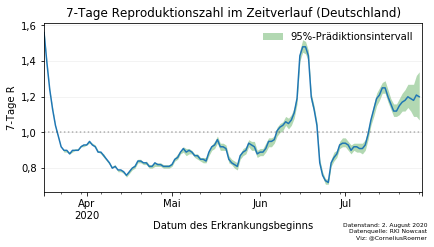

In [50]:
start=15
locale.setlocale(locale.LC_ALL, 'de_DE')
locale.setlocale(locale.LC_NUMERIC, 'de_DE')
plt.rcParams['axes.formatter.use_locale'] = True
fig = plt.figure(num=None, figsize=(7, 3.5), facecolor='w', edgecolor='k')
ax = nowcast.k[start:-1].plot(zorder=1)
ax.fill_between(nowcast.index[start:-1],nowcast.l[start:-1],nowcast.m[start:-1],color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(right=nowcast.index[-2]+pd.Timedelta(days=1))
plt.title("7-Tage Reproduktionszahl im Zeitverlauf (Deutschland)")
plt.ylabel("7-Tage R")
plt.xlabel("Datum des Erkrankungsbeginns",labelpad=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
ax.axhline(1,c='black',ls=':',alpha=0.3)
#ax.tick_params(axis='x', which='major', pad=-10)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
fig.text(0.91, 0.04, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=6, va="bottom", ha="right")
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.23)
plt.savefig('7rNear.png',dpi=400)

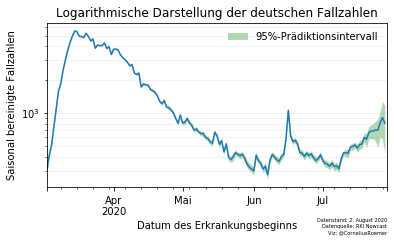

In [51]:
adjusted_b = result_b.observed / result_b.seasonal
adjusted_c = nowcast.c[0:] / result_b.seasonal
adjusted_d = nowcast.d[0:] / result_b.seasonal

locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[0:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
#ax.set_xlim(left=nowcast.index[1])
ax.set_xlim(left=nowcast.index[1],right=nowcast.index[-1]+pd.Timedelta(days=1))
#ax.set_ylim(top=1500,bottom=0)
plt.yscale('log')
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
plt.title("Logarithmische Darstellung der deutschen Fallzahlen")
plt.ylabel("Saisonal bereinigte Fallzahlen")
plt.xlabel("Datum des Erkrankungsbeginns")
ax.tick_params(axis='x', which='major', pad=5)
plt.grid(axis = 'y', b=True, which='both', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.25)
fig.text(0.90, 0.06, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=5, va="bottom", ha="right")
plt.savefig('CasesLog.png',dpi=400)

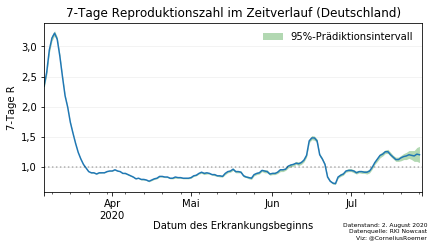

In [52]:
start=4
locale.setlocale(locale.LC_ALL, 'de_DE')
locale.setlocale(locale.LC_NUMERIC, 'de_DE')
plt.rcParams['axes.formatter.use_locale'] = True
fig = plt.figure(num=None, figsize=(7, 3.5), facecolor='w', edgecolor='k')
ax = nowcast.k[start:-1].plot(zorder=1)
ax.fill_between(nowcast.index[start:-1],nowcast.l[start:-1],nowcast.m[start:-1],color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(right=nowcast.index[-2]+pd.Timedelta(days=1))
plt.title("7-Tage Reproduktionszahl im Zeitverlauf (Deutschland)")
plt.ylabel("7-Tage R")
plt.xlabel("Datum des Erkrankungsbeginns",labelpad=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
ax.axhline(1,c='black',ls=':',alpha=0.3)
#ax.tick_params(axis='x', which='major', pad=-10)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
fig.text(0.91, 0.04, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=6, va="bottom", ha="right")
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.23)
plt.savefig('7rAll.png',dpi=400)

/Users/cornelius/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


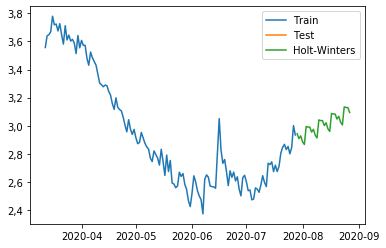

In [53]:
import statsmodels.api as sm
import numpy as np
nowcast.index.freq = 'D'
nowcast['log_b'] = np.log10(nowcast['b'])
train,test = nowcast['log_b'][10:], nowcast['log_b'][-1:]
model = sm.tsa.statespace.ExponentialSmoothing(train, trend=True,seasonal=7).fit()
pred = model.predict(start=test.index[0]+1, end=test.index[-1]+30)
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

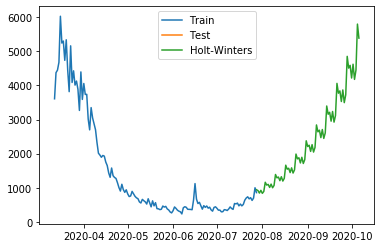

In [54]:

nowcast.index.freq = 'D'
train,test = nowcast['b'][10:], nowcast['b'][-1:]
model = hw.ExponentialSmoothing(train, trend='mul', seasonal='mul', damped=True, seasonal_periods=7).fit()
pred = model.predict(start=test.index[0], end=test.index[-1]+70)
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')